In [130]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [131]:
df = pd.read_csv('Titanic.csv')

In [132]:
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [133]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [134]:
df.shape

(891, 12)

In [135]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [137]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [138]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [139]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [140]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [142]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [144]:
df['Age'].fillna(df['Age'].median(),inplace=True)

C:\Users\Egor_\AppData\Local\Temp\ipykernel_24212\1527141296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [145]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [147]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [148]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [149]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [150]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,3,413,0,28.0,1,2,675,23.4500,147,2
889,890,1,81,1,26.0,0,0,8,30.0000,60,0


In [151]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Modeling

In [152]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.014205
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226


In [153]:
import numpy as np
np.var(df['Sex'])

np.float64(0.22821808306282676)

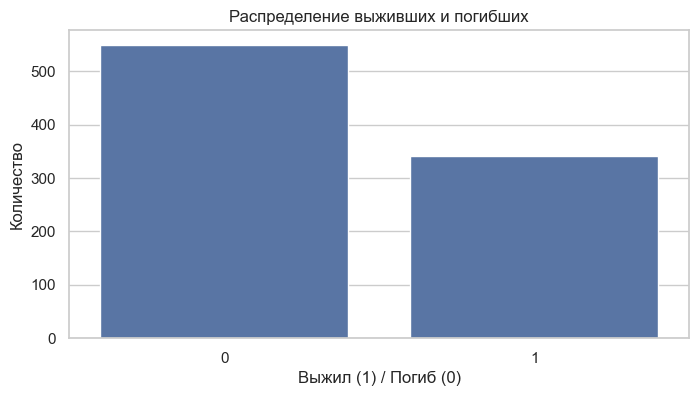

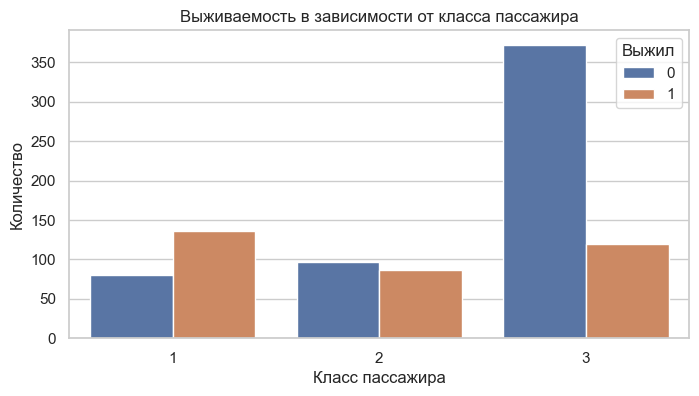

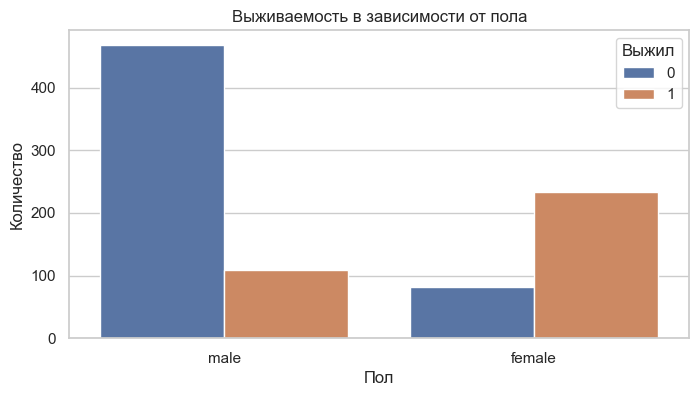

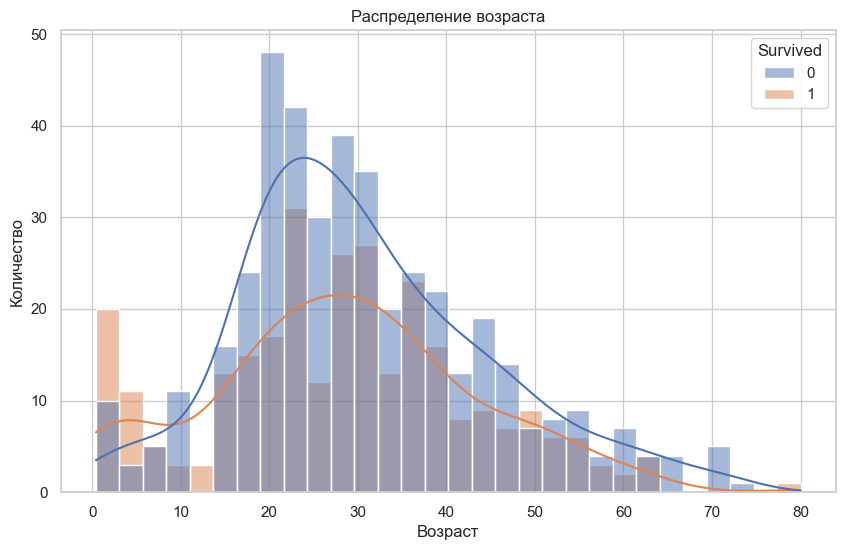

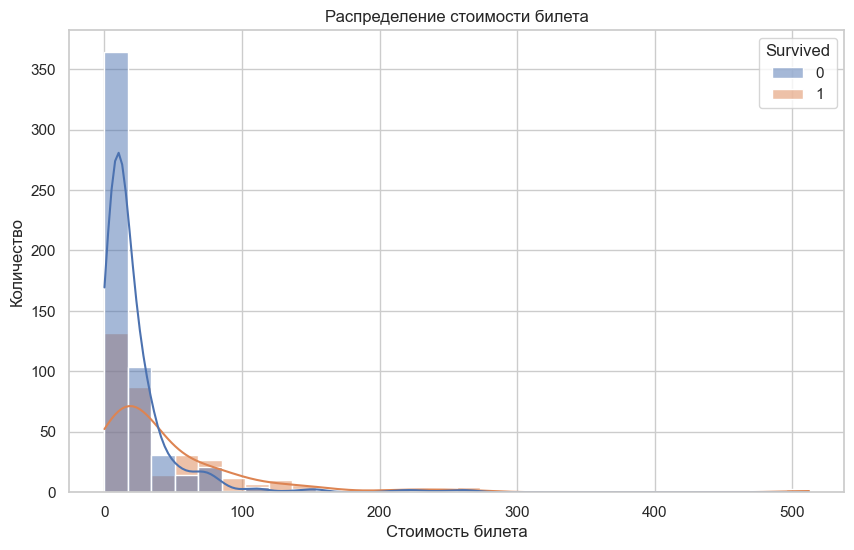

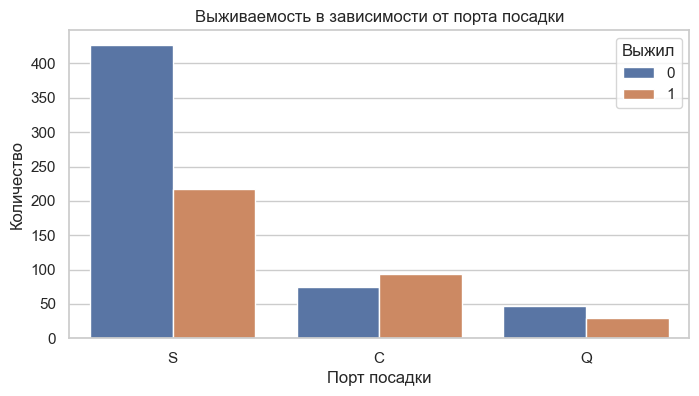

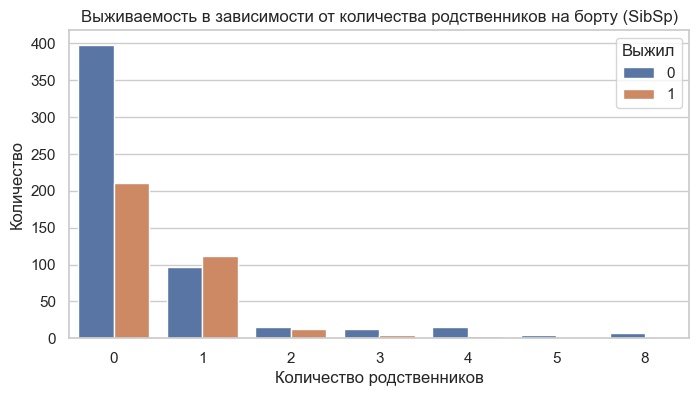

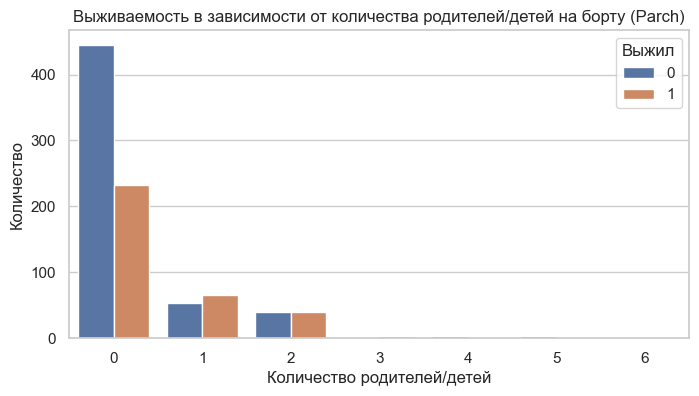

In [154]:
# Импортируем библиотеку pandas для работы с данными в виде таблиц
import pandas as pd
# Импортируем matplotlib для создания графиков
import matplotlib.pyplot as plt
# Импортируем seaborn для создания визуализаций и улучшенного оформления графиков
import seaborn as sns

# Загрузка данных из файла 'Titanic.csv' и сохранение их в переменной data
data = pd.read_csv('Titanic.csv')

# Устанавливаем стиль 'whitegrid' для графиков, чтобы добавить фон сетки и облегчить чтение графиков
sns.set(style="whitegrid")

# 1. График распределения выживших и погибших
plt.figure(figsize=(8, 4))  # Устанавливаем размер графика
sns.countplot(x='Survived', data=data)  # Создаем график количества выживших и погибших
plt.title('Распределение выживших и погибших')  # Заголовок графика
plt.xlabel('Выжил (1) / Погиб (0)')  # Название оси X
plt.ylabel('Количество')  # Название оси Y
plt.show()  # Отображаем график

# 2. График распределения по классам
plt.figure(figsize=(8, 4))  # Устанавливаем размер графика
sns.countplot(x='Pclass', data=data, hue='Survived')  # Создаем график по классам с оттенком по выживаемости
plt.title('Выживаемость в зависимости от класса пассажира')  # Заголовок графика
plt.xlabel('Класс пассажира')  # Название оси X
plt.ylabel('Количество')  # Название оси Y
plt.legend(title='Выжил')  # Добавляем легенду с пояснением
plt.show()  # Отображаем график

# 3. График распределения по полу
plt.figure(figsize=(8, 4))  # Устанавливаем размер графика
sns.countplot(x='Sex', data=data, hue='Survived')  # График по полу с оттенком по выживаемости
plt.title('Выживаемость в зависимости от пола')  # Заголовок графика
plt.xlabel('Пол')  # Название оси X
plt.ylabel('Количество')  # Название оси Y
plt.legend(title='Выжил')  # Добавляем легенду с пояснением
plt.show()  # Отображаем график

# 4. График распределения возраста
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
sns.histplot(data=data, x='Age', bins=30, kde=True, hue='Survived')  # Гистограмма распределения возраста с выживаемостью
plt.title('Распределение возраста')  # Заголовок графика
plt.xlabel('Возраст')  # Название оси X
plt.ylabel('Количество')  # Название оси Y
plt.show()  # Отображаем график

# 5. Распределение стоимости билета (Fare)
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
sns.histplot(data=data, x='Fare', bins=30, kde=True, hue='Survived')  # Гистограмма стоимости билета с выживаемостью
plt.title('Распределение стоимости билета')  # Заголовок графика
plt.xlabel('Стоимость билета')  # Название оси X
plt.ylabel('Количество')  # Название оси Y
plt.show()  # Отображаем график

# 6. Анализ порта посадки
plt.figure(figsize=(8, 4))  # Устанавливаем размер графика
sns.countplot(x='Embarked', data=data, hue='Survived')  # График количества выживших по портам посадки
plt.title('Выживаемость в зависимости от порта посадки')  # Заголовок графика
plt.xlabel('Порт посадки')  # Название оси X
plt.ylabel('Количество')  # Название оси Y
plt.legend(title='Выжил')  # Добавляем легенду
plt.show()  # Отображаем график

# 7. Взаимосвязь количества родственников на борту (SibSp) и выживаемости
plt.figure(figsize=(8, 4))  # Устанавливаем размер графика
sns.countplot(x='SibSp', data=data, hue='Survived')  # График по количеству братьев/сестер, супругов с выживаемостью
plt.title('Выживаемость в зависимости от количества родственников на борту (SibSp)')  # Заголовок
plt.xlabel('Количество родственников')  # Название оси X
plt.ylabel('Количество')  # Название оси Y
plt.legend(title='Выжил')  # Добавляем легенду
plt.show()  # Отображаем график

# 8. Взаимосвязь количества родителей/детей на борту (Parch) и выживаемости
plt.figure(figsize=(8, 4))  # Устанавливаем размер графика
sns.countplot(x='Parch', data=data, hue='Survived')  # График по количеству родителей/детей на борту
plt.title('Выживаемость в зависимости от количества родителей/детей на борту (Parch)')  # Заголовок
plt.xlabel('Количество родителей/детей')  # Название оси X
plt.ylabel('Количество')  # Название оси Y
plt.legend(title='Выжил')  # Добавляем легенду
plt.show()  # Отображаем график


A100 - 2m

In [155]:
#feature_importances

Epoch 1/30


c:\Users\Egor_\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5914 - loss: 0.6795 - val_accuracy: 0.7000 - val_loss: 0.6253
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6320 - loss: 0.6386 - val_accuracy: 0.8000 - val_loss: 0.5526
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7297 - loss: 0.5474 - val_accuracy: 0.8562 - val_loss: 0.4751
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7359 - loss: 0.5142 - val_accuracy: 0.8500 - val_loss: 0.4152
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7630 - loss: 0.4760 - val_accuracy: 0.8500 - val_loss: 0.3733
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7939 - loss: 0.4396 - val_accuracy: 0.8625 - val_loss: 0.3328
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8214 - loss: 0.3930 - val_accuracy: 0.8687 - val_loss: 0.3163
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8177 - loss: 0.3742 - val_accuracy: 0.8750 - val_loss: 0.3019
Ep

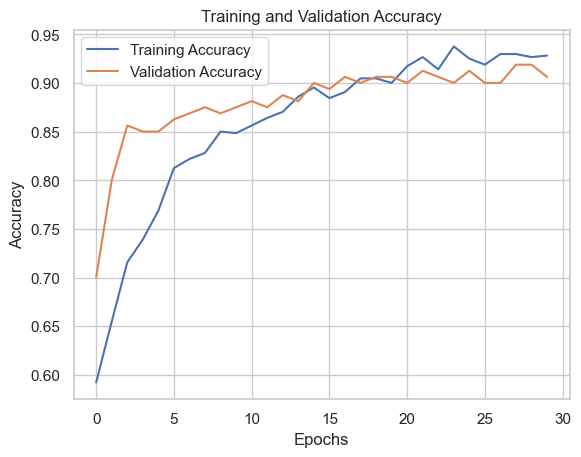

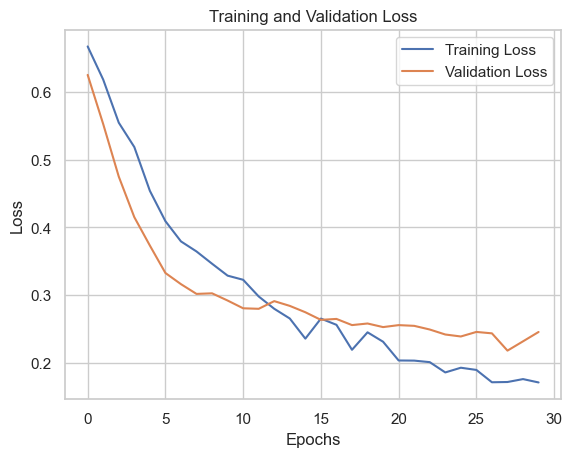

In [156]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# 1. Генерация синтетического набора данных
# Создаем случайный набор данных для бинарной классификации с 1000 образцами и 20 признаками
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, random_state=42)

# 2. Разделение данных на обучающую и тестовую выборки
# 80% данных используем для обучения, 20% — для тестирования модели
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Нормализация данных
# Применяем стандартизацию, чтобы привести данные к единому масштабу, что ускоряет обучение сети
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Подгоняем и трансформируем обучающие данные
X_test = scaler.transform(X_test)  # Трансформируем тестовые данные на основе обучающей выборки

# 4. Построение нейронной сети с улучшенной архитектурой
# Создаем последовательную модель
model = Sequential()

# Первый слой с 64 нейронами и активацией ReLU
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# Dropout для регуляризации, чтобы предотвратить переобучение
model.add(Dropout(0.3))

# Второй полносвязный слой с 32 нейронами и Dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Третий полносвязный слой с 16 нейронами
model.add(Dense(16, activation='relu'))

# Выходной слой с одним нейроном и сигмоидальной активацией для предсказания вероятности
model.add(Dense(1, activation='sigmoid'))

# 5. Компиляция модели
# Оптимизатор — Adam с уменьшенным learning rate для более плавного обучения
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 6. Обучение модели
# Обучаем модель на тренировочных данных, добавляем валидацию и увеличиваем количество эпох
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# 7. Оценка модели на тестовых данных
# Оцениваем точность и потери на тестовом наборе
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# 8. Визуализация метрик обучения
# Строим графики точности и потерь для обучающей и валидационной выборок

# График точности
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# График потерь
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


.pkl .h5 .gguf

In [157]:
import joblib
joblib.dump(model, 'fully-connected-model.pkl')

['fully-connected-model.pkl']

In [158]:
model_loaded = joblib.load('fully-connected-model.pkl')

In [159]:
model_loaded.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[8.40045232e-03],
       [2.93328922e-04],
       [2.83683836e-01],
       [2.22705677e-01],
       [9.77595866e-01],
       [4.69442219e-01],
       [9.99951124e-01],
       [1.53656758e-03],
       [9.75484490e-01],
       [3.82786810e-01],
       [4.11920361e-02],
       [6.69762194e-02],
       [9.97925758e-01],
       [9.64341402e-01],
       [2.74490705e-03],
       [5.60427259e-04],
       [9.82894659e-01],
       [5.99320140e-03],
       [9.98441815e-01],
       [8.42926145e-01],
       [3.91126364e-01],
       [9.95834529e-01],
       [2.17199147e-01],
       [9.99524832e-01],
       [6.12341762e-01],
       [9.71125185e-01],
       [8.34733486e-01],
       [6.62797969e-03],
       [8.71606648e-01],
       [2.80507803e-02],
       [8.14277470e-01],
       [1.02934224e-04],
       [8.25290859e-04],
       [6.98344111e-01],
       [9.99446929e-01],
       [3.67601402e-02],
       [9.81958628e-01],
       [7.09078554e-03],
       [9.73339915e-01],
       [9.77343798e-01],


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9570 - loss: 0.1497 - val_accuracy: 0.9250 - val_loss: 0.2301
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9196 - loss: 0.1665 - val_accuracy: 0.9250 - val_loss: 0.2368
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9506 - loss: 0.1177 - val_accuracy: 0.9125 - val_loss: 0.2490
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9339 - loss: 0.1605 - val_accuracy: 0.9187 - val_loss: 0.2452
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9623 - loss: 0.1295 - val_accuracy: 0.9250 - val_loss: 0.2373
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9433 - loss: 0.1305 - val_accuracy: 0.9187 - val_loss: 0.2425
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9397 - loss: 0.1499 - val_accuracy: 0.9125 - val_loss: 0.2650
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9585 - loss: 0.1168 - val_accuracy: 0.9125 - val_loss:

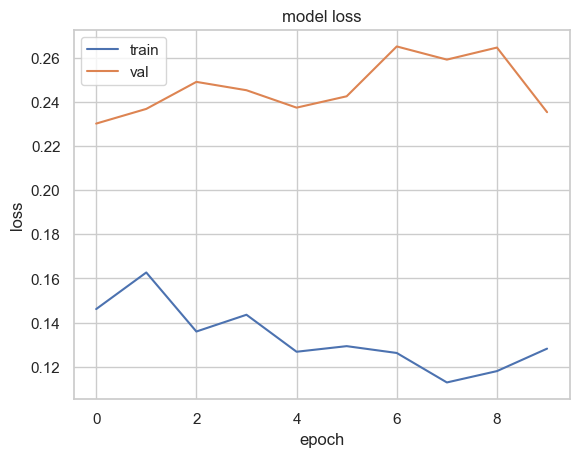

In [160]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Пример хорошего графика

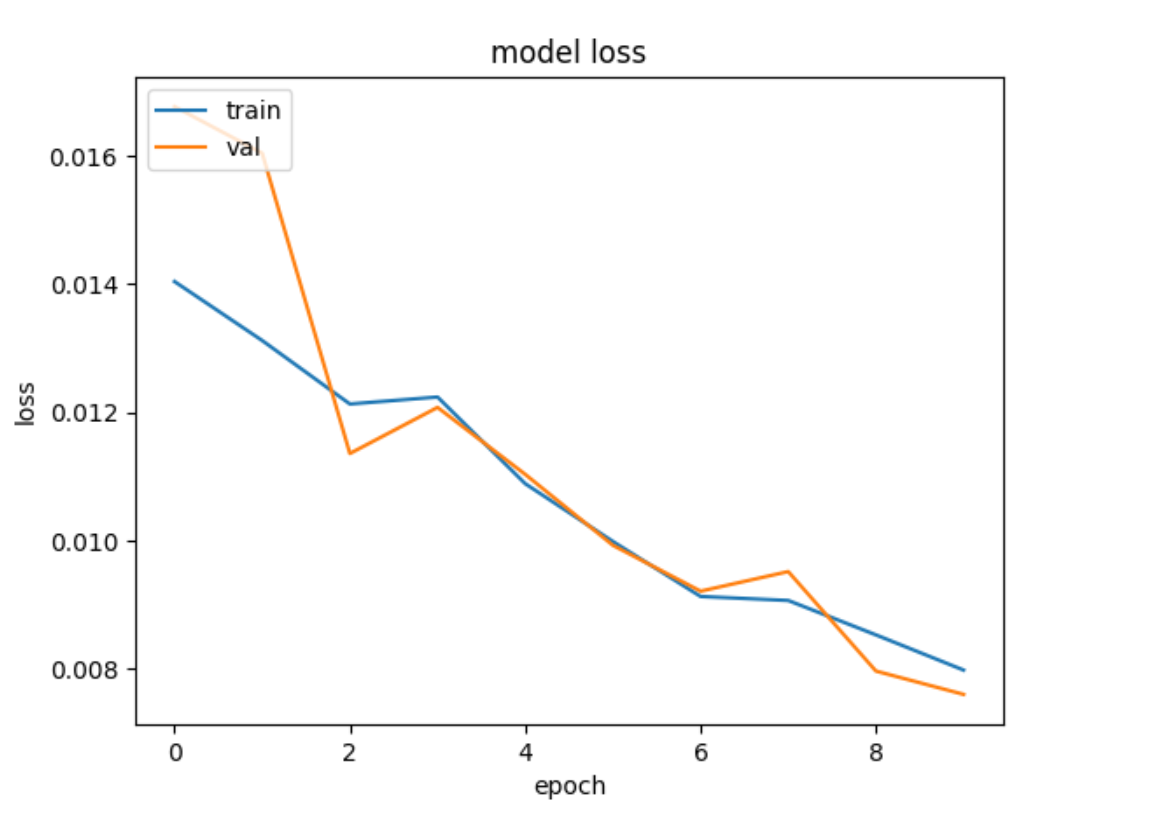

In [161]:
df = pd.read_csv('Titanic.csv')

In [162]:
df.shape

(891, 12)

In [163]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [164]:
df['Survived'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

In [165]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [166]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [167]:
# Find Outliers in DataFrame

import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5, 100],
    'B': [10, 12, 14, 13, 15, 200],
    'C': [5, 6, 7, 8, 9, 300]
}

df = pd.DataFrame(data)

# Function to find outliers
def find_outliers(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Get outliers
outliers = find_outliers(df)
print(outliers)

{'A':      A    B    C
5  100  200  300, 'B':      A    B    C
5  100  200  300, 'C':      A    B    C
5  100  200  300}
